In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip the dataset
# import zipfile
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/capstone/Echos.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/capstone/Echos")
# zip_ref.close()


In [ ]:
# !pip install SimpleITK
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00


In [ ]:
# !pip install gdcm
# !pip install pylibjpeg pylibjpeg-libjpeg


In [ ]:
import os
# import SimpleITK as sikt
# import pydicom
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv2
import imageio
from pathlib import Path
from torchvision import transforms
from pathlib import Path
import scipy.misc
from tqdm import tqdm

define the path to the dicom files and also the path to store the processed npy files

In [ ]:
ROOT_PATH = Path(r"/content/drive/MyDrive/capstone/dataset/Echos")
SAVE_PATH = Path(r"/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom")

In [ ]:
# # test on single dicom
# dcm_path = '/content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001/IM000003'
# # image = sitk.ReadImage(dcm_path)
# # image_array = sitk.GetArrayFromImage(image)
# dcm = pydicom.read_file(dcm_path).pixel_array

## Dicom Reading & Effective storage

存储为npy数组(float16)  [单通道]

In [ ]:
import logging

def load_img(root_path,save_path):
  """
  load data as npy template (e.g. LVT/XXX/PT000000/ST000000/SE000001 or STEMI/XXX/PT000000/ST000000/SE000000)
  :param root_path
  :return: None
  """
  order = 1
  patient = []
  class_dict = {'STEMI':0, 'LVT': 1}

  for root,dirs,files in tqdm(os.walk(root_path)): 
    if len(files) > 1:
      print('processing:',root)
      for file in files: # file: a video "IM000000"
        root = Path(root)
        dcm_path = root/file   
        patient_id = str(dcm_path).split("/")[-5] 
        if patient_id not in patient:
          order = 1
          patient.append(patient_id)
        label = class_dict[str(dcm_path).split("/")[-6]]
        try: 
          dcm_array = pydicom.read_file(dcm_path).pixel_array         
        except RuntimeError as e:
          logging.error(f"Error reading DICOM file: {dcm_path}, {e}")
          continue #skip the problematic file
        except ValueError as e:
          logging.error(f"Error reading DICOM file: {dcm_path}, {e}")
          continue #skip the problematic file
        else:
          if len(dcm_array.shape) == 4:
            current_save_path = save_path/str(label)/str(patient_id)
            current_save_path.mkdir(parents=True,exist_ok=True)
            
            dcm_array = (dcm_array[:,:,:,0] ) #存储单通道数据
            
            np.save(current_save_path/str(order),dcm_array.astype(np.float16))  # Save the array in the corresponding directory
            order += 1
          

In [ ]:
load_img(ROOT_PATH,SAVE_PATH)

10it [00:45,  3.89s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0002/PT000000/ST000000/SE000001


15it [01:10,  3.44s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0003/PT000000/ST000000/SE000001


20it [01:43,  3.95s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0004/PT000000/ST000000/SE000001


25it [02:20,  4.48s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0005/PT000000/ST000000/SE000001


30it [03:12,  5.81s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0006/PT000000/ST000000/SE000001


35it [03:42,  4.41s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0007/PT000000/ST000000/SE000001


40it [05:01,  7.79s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0008/PT000000/ST000000/SE000001


45it [05:34,  4.81s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0009/PT000000/ST000000/SE000001


50it [06:14,  4.66s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0010/PT000000/ST000000/SE000001


55it [06:41,  3.72s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0011/PT000000/ST000000/SE000001


56it [07:18, 10.96s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001/IM000003, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001/IM000006, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001/IM000008, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0012/PT000000/ST000000/SE000001/IM000013, The following handlers are available to decode the

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0013/PT000000/ST000000/SE000001


70it [09:20,  6.80s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0014/PT000000/ST000000/SE000001


75it [09:49,  4.22s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0015/PT000000/ST000000/SE000001


80it [10:22,  3.96s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0016/PT000000/ST000000/SE000001


85it [10:55,  3.77s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0018/PT000000/ST000000/SE000001


89it [11:29,  5.18s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0019/PT000000/ST000000/SE000000


95it [12:12,  4.74s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0020/PT000000/ST000000/SE000001


100it [12:36,  3.72s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0021/PT000000/ST000000/SE000001


105it [13:18,  4.47s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0023/PT000000/ST000000/SE000001


109it [13:50,  5.08s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0025/PT000000/ST000000/SE000000


113it [14:14,  4.72s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0026/PT000000/ST000000/SE000000


120it [14:38,  3.07s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0027/PT000000/ST000000/SE000001


123it [15:20,  6.47s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0028/PT000000/ST000000/SE000000


130it [15:48,  3.84s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0031/PT000000/ST000000/SE000001


135it [16:27,  4.91s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0032/PT000000/ST000000/SE000001


140it [16:59,  3.99s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0033/PT000000/ST000000/SE000001


145it [17:39,  4.49s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0035/PT000000/ST000000/SE000001


150it [18:14,  4.14s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0036/PT000000/ST000000/SE000001


155it [18:47,  3.87s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0038/PT000000/ST000000/SE000001


159it [19:26,  5.82s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000/IM000003, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000/IM000007, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000/IM000009, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000/IM000011, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0039/PT000000/ST000000/SE000000/IM000015, The RLE header specifies an invalid number of segments (3774863615)
ERROR

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0041/PT000000/ST000000/SE000001


170it [20:08,  3.53s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0045/PT000000/ST000000/SE000001


173it [20:56,  7.82s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0046/PT000000/ST000000/SE000000


179it [21:36,  5.48s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0047/PT000000/ST000000/SE000001


183it [22:17,  6.82s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0048/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0048/PT000000/ST000000/SE000000/IM000003, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
183it [22:30,  6.82s/it]ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0048/PT000000/ST000000/SE000000/IM000013, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0048/PT000000/ST000000/SE000000/IM000017, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0048/PT000000/ST000000/SE000000/IM000019, The following handlers are

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0049/PT000000/ST000000/SE000001


193it [24:54,  9.14s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0050/PT000000/ST000000/SE000000


200it [25:30,  5.24s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0051/PT000000/ST000000/SE000001


205it [26:09,  5.02s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0052/PT000000/ST000000/SE000001


211it [26:34,  2.80s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0054/PT000000/ST000000/SE000001


216it [27:11,  3.92s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0055/PT000000/ST000000/SE000001


222it [27:39,  3.00s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0056/PT000000/ST000000/SE000001


226it [28:14,  4.97s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0057/PT000000/ST000000/SE000000


230it [30:29, 16.69s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0058/PT000000/ST000000/SE000000


234it [30:59,  9.09s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0059/PT000000/ST000000/SE000000


238it [32:14, 11.52s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0060/PT000000/ST000000/SE000000


241it [32:57, 11.42s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0061/PT000000/ST000000/SE000000


245it [33:19,  7.37s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0062/PT000000/ST000000/SE000000


249it [33:54,  7.23s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0063/PT000000/ST000000/SE000000


253it [34:22,  6.51s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0064/PT000000/ST000000/SE000000


257it [34:48,  5.85s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000/IM000000, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000/IM000001, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000/IM000002, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000/IM000003, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0066/PT000000/ST000000/SE000000/IM000004, The RLE header specifies an invalid number of segments (3774863615)
ERROR

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0067/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0067/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (62862 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0067/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (62332 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0067/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (65538 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM 

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0068/PT000000/ST000000/SE000000


270it [36:26,  6.41s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0069/PT000000/ST000000/SE000000


274it [37:42, 11.03s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0070/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0070/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (62462 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0070/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (61468 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0070/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (64566 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM 

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0071/PT000000/ST000000/SE000001


287it [40:39,  7.25s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001/IM000000, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001/IM000001, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001/IM000004, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001/IM000005, The RLE header specifies an invalid number of segments (3774863615)
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0072/PT000000/ST000000/SE000001/IM000006, The RLE header specifies an invalid number of segments (3774863615)
ERROR

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0073/PT000000/ST000000/SE000001


297it [41:30,  4.36s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0075/PT000000/ST000000/SE000001


302it [42:06,  4.53s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0076/PT000000/ST000000/SE000001


307it [42:38,  4.00s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0077/PT000000/ST000000/SE000001


311it [43:13,  5.29s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0078/PT000000/ST000000/SE000000


316it [45:24, 12.42s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0079/PT000000/ST000000/SE000001


320it [46:14,  9.75s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0080/PT000000/ST000000/SE000000


324it [47:46, 13.65s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0081/PT000000/ST000000/SE000000


329it [49:06, 11.11s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0082/PT000000/ST000000/SE000001


334it [49:27,  5.02s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0083/PT000000/ST000000/SE000001


339it [50:02,  4.29s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0084/PT000000/ST000000/SE000001


343it [50:24,  3.98s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0085/PT000000/ST000000/SE000000


347it [51:43, 10.28s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0086/PT000000/ST000000/SE000000


351it [52:34,  9.20s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0087/PT000000/ST000000/SE000000


356it [53:18,  6.12s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0088/PT000000/ST000000/SE000001


360it [53:45,  5.51s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0089/PT000000/ST000000/SE000000


366it [54:31,  5.27s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0091/PT000000/ST000000/SE000001


369it [55:03,  6.69s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0092/PT000000/ST000000/SE000000


375it [55:58,  6.37s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0093/PT000000/ST000000/SE000001


380it [56:37,  5.43s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0094/PT000000/ST000000/SE000001


383it [57:07,  6.61s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0095/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0095/PT000000/ST000000/SE000000/IM000003, The length of the pixel data in the dataset (72584 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0095/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (65354 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0095/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (97804 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM 

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0096/PT000000/ST000000/SE000001


395it [58:19,  4.04s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0097/PT000000/ST000000/SE000001


400it [58:54,  4.32s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0098/PT000000/ST000000/SE000001


404it [59:14,  3.74s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0099/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0099/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (53494 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0099/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (56864 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0099/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (47980 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM 

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0100/PT000000/ST000000/SE000001


415it [1:01:15,  5.65s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0101/PT000000/ST000000/SE000001


422it [1:01:53,  4.16s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0102/PT000000/ST000000/SE000001


428it [1:02:16,  3.07s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0103/PT000000/ST000000/SE000001


433it [1:02:56,  4.29s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0104/PT000000/ST000000/SE000001


438it [1:03:58,  6.20s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0105/PT000000/ST000000/SE000001


443it [1:04:23,  3.72s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0106/PT000000/ST000000/SE000001


448it [1:05:20,  5.87s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0107/PT000000/ST000000/SE000001


453it [1:05:50,  3.31s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0108/PT000000/ST000000/SE000001


458it [1:06:33,  4.55s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0109/PT000000/ST000000/SE000001


464it [1:07:11,  3.98s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0110/PT000000/ST000000/SE000001


469it [1:07:40,  3.75s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0111/PT000000/ST000000/SE000001


474it [1:08:18,  4.52s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0112/PT000000/ST000000/SE000001


479it [1:08:49,  3.84s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0113/PT000000/ST000000/SE000001


484it [1:09:16,  3.31s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0114/PT000000/ST000000/SE000001


489it [1:09:43,  3.16s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0115/PT000000/ST000000/SE000001


494it [1:10:31,  4.94s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0116/PT000000/ST000000/SE000001


500it [1:11:06,  3.80s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0117/PT000000/ST000000/SE000001


505it [1:11:40,  3.92s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0119/PT000000/ST000000/SE000001


510it [1:12:21,  4.47s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0120/PT000000/ST000000/SE000001


516it [1:12:53,  3.75s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0121/PT000000/ST000000/SE000001


520it [1:13:16,  3.79s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0122/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0122/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (90154 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0122/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (89006 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/STEMI/0122/PT000000/ST000000/SE000000/IM000012, The length of the pixel data in the dataset (108694 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1270/PT000000/ST000000/SE000001


531it [1:14:53,  5.15s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1271/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1271/PT000000/ST000000/SE000000/IM000019, The length of the pixel data in the dataset (69972 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1271/PT000000/ST000000/SE000000/IM000022, The length of the pixel data in the dataset (67806 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1271/PT000000/ST000000/SE000000/IM000023, The length of the pixel data in the dataset (96840 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1272/PT000000/ST000000/SE000001


542it [1:17:23,  6.41s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1273/PT000000/ST000000/SE000001


547it [1:18:10,  5.68s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1274/PT000000/ST000000/SE000001


552it [1:18:47,  4.67s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1275/PT000000/ST000000/SE000001


556it [1:19:41,  7.72s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1276/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1276/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (65392 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1276/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (70508 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1276/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (68508 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1277/PT000000/ST000000/SE000000


567it [1:21:44,  6.95s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1278/PT000000/ST000000/SE000001


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1278/PT000000/ST000000/SE000001/IM000007, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1278/PT000000/ST000000/SE000001/IM000008, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1278/PT000000/ST000000/SE000001/IM000009, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1278/PT000000/ST000000/SE000001/IM000011, The following handlers are available to decode the pixel d

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1279/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1279/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (75772 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1279/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (72900 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1279/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (106708 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file:

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1280/PT000000/ST000000/SE000000


582it [1:24:24,  5.73s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1281/PT000000/ST000000/SE000001


585it [1:25:26, 10.15s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1282/PT000000/ST000000/SE000000


592it [1:26:15,  6.40s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1283/PT000000/ST000000/SE000001


597it [1:27:01,  6.04s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1284/PT000000/ST000000/SE000001


602it [1:27:36,  5.04s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1285/PT000000/ST000000/SE000001


605it [1:28:07,  6.44s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1286/PT000000/ST000000/SE000000


612it [1:28:35,  3.82s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1287/PT000000/ST000000/SE000001


617it [1:29:07,  3.96s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1288/PT000000/ST000000/SE000001


620it [1:29:58,  8.24s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1289/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1289/PT000000/ST000000/SE000000/IM000004, The length of the pixel data in the dataset (63994 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1289/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (68012 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1289/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (83452 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1290/PT000000/ST000000/SE000001


630it [1:32:14,  9.64s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1291/PT000000/ST000000/SE000000


637it [1:33:25,  7.71s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1292/PT000000/ST000000/SE000001


642it [1:33:57,  5.49s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1293/PT000000/ST000000/SE000001


646it [1:34:25,  5.07s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1294/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1294/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (73626 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1294/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (82426 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1294/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (116012 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file:

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1295/PT000000/ST000000/SE000001


657it [1:36:20,  6.47s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1296/PT000000/ST000000/SE000001


662it [1:37:18,  6.57s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1297/PT000000/ST000000/SE000001


666it [1:37:49,  5.75s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1298/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1298/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (81170 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1298/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (80472 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1298/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (76418 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1299/PT000000/ST000000/SE000001


677it [1:40:09,  8.56s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1300/PT000000/ST000000/SE000001


682it [1:41:08,  7.84s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1301/PT000000/ST000000/SE000001


687it [1:41:42,  5.55s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1302/PT000000/ST000000/SE000001


692it [1:42:16,  4.76s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1303/PT000000/ST000000/SE000001


696it [1:42:43,  4.91s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1304/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1304/PT000000/ST000000/SE000000/IM000001, The length of the pixel data in the dataset (70130 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
701it [1:42:45,  2.20s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1305/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1305/PT000000/ST000000/SE000000/IM000004, The length of the pixel data in the dataset (71148 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1305/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (62922 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1305/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (121766 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file:

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1306/PT000000/ST000000/SE000001


712it [1:44:23,  4.00s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1307/PT000000/ST000000/SE000001


717it [1:45:05,  4.63s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1308/PT000000/ST000000/SE000001


722it [1:45:31,  3.45s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1309/PT000000/ST000000/SE000001


726it [1:45:55,  3.93s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1310/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1310/PT000000/ST000000/SE000000/IM000002, The length of the pixel data in the dataset (63954 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1310/PT000000/ST000000/SE000000/IM000003, The length of the pixel data in the dataset (63912 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1310/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (64882 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1311/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1311/PT000000/ST000000/SE000000/IM000006, The length of the pixel data in the dataset (63852 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1311/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (66710 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1311/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (68344 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1312/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1312/PT000000/ST000000/SE000000/IM000001, The length of the pixel data in the dataset (78510 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1312/PT000000/ST000000/SE000000/IM000002, The length of the pixel data in the dataset (84238 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1312/PT000000/ST000000/SE000000/IM000003, The length of the pixel data in the dataset (72552 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1313/PT000000/ST000000/SE000001


746it [1:48:20,  4.09s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1314/PT000000/ST000000/SE000001


751it [1:49:05,  4.87s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1315/PT000000/ST000000/SE000001


756it [1:50:08,  6.71s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1316/PT000000/ST000000/SE000001


761it [1:51:02,  6.31s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1317/PT000000/ST000000/SE000001


766it [1:52:21,  8.39s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1318/PT000000/ST000000/SE000001


771it [1:53:10,  6.24s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1319/PT000000/ST000000/SE000001


776it [1:53:46,  4.69s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1320/PT000000/ST000000/SE000001


781it [1:54:07,  2.99s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1321/PT000000/ST000000/SE000001


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1321/PT000000/ST000000/SE000001/IM000001, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1321/PT000000/ST000000/SE000001/IM000002, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1321/PT000000/ST000000/SE000001/IM000005, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1321/PT000000/ST000000/SE000001/IM000006, The following handlers are available to decode the pixel d

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1322/PT000000/ST000000/SE000001


790it [1:56:28,  9.25s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1323/PT000000/ST000000/SE000000


797it [1:57:13,  5.69s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1324/PT000000/ST000000/SE000001


802it [1:57:56,  5.61s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1325/PT000000/ST000000/SE000001


806it [1:58:23,  5.01s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1326/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1326/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (75502 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1326/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (70604 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1326/PT000000/ST000000/SE000000/IM000013, The length of the pixel data in the dataset (122634 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file:

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1327/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1327/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (73118 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1327/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (84300 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1327/PT000000/ST000000/SE000000/IM000013, The length of the pixel data in the dataset (74348 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1328/PT000000/ST000000/SE000001


820it [2:01:27, 10.84s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1329/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1329/PT000000/ST000000/SE000000/IM000009, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
820it [2:01:41, 10.84s/it]ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1329/PT000000/ST000000/SE000000/IM000013, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1329/PT000000/ST000000/SE000000/IM000025, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1329/PT000000/ST000000/SE000000/IM000029, The following handlers are avail

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1330/PT000000/ST000000/SE000000


830it [2:03:40,  9.50s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1331/PT000000/ST000000/SE000000


837it [2:04:06,  5.01s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1332/PT000000/ST000000/SE000001


840it [2:05:02,  9.02s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1333/PT000000/ST000000/SE000000


845it [2:05:32,  6.51s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1348/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1348/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (70148 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1348/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (75786 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1348/PT000000/ST000000/SE000000/IM000012, The length of the pixel data in the dataset (69946 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1349/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1349/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (66032 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1349/PT000000/ST000000/SE000000/IM000009, The length of the pixel data in the dataset (68810 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1349/PT000000/ST000000/SE000000/IM000011, The length of the pixel data in the dataset (66584 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1350/PT000000/ST000000/SE000000


860it [2:07:21,  5.83s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1351/PT000000/ST000000/SE000000


866it [2:08:05,  5.34s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1352/PT000000/ST000000/SE000001


871it [2:08:51,  5.67s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1353/PT000000/ST000000/SE000001


876it [2:09:52,  6.57s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1354/PT000000/ST000000/SE000001


881it [2:10:28,  4.78s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1355/PT000000/ST000000/SE000001


886it [2:11:21,  5.81s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1357/PT000000/ST000000/SE000001


891it [2:12:59,  9.86s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1358/PT000000/ST000000/SE000001


895it [2:13:29,  6.63s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1359/PT000000/ST000000/SE000000


899it [2:14:41, 11.08s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1360/PT000000/ST000000/SE000000


906it [2:15:46,  7.69s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1361/PT000000/ST000000/SE000001


910it [2:16:29,  7.51s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1362/PT000000/ST000000/SE000000


914it [2:17:12,  7.79s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1363/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1363/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (68474 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1363/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (70078 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1363/PT000000/ST000000/SE000000/IM000011, The length of the pixel data in the dataset (86068 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1364/PT000000/ST000000/SE000000


926it [2:19:11,  6.21s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1365/PT000000/ST000000/SE000001


930it [2:19:49,  5.65s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1366/PT000000/ST000000/SE000000


934it [2:19:56,  2.80s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1367/PT000000/ST000000/SE000000


940it [2:20:16,  2.21s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1368/PT000000/ST000000/SE000001


945it [2:21:16,  5.62s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1369/PT000000/ST000000/SE000001


950it [2:22:04,  5.55s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1370/PT000000/ST000000/SE000001


956it [2:23:14,  6.59s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1371/PT000000/ST000000/SE000001


961it [2:23:50,  4.76s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1372/PT000000/ST000000/SE000001


965it [2:24:24,  5.54s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1373/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1373/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (68460 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1373/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (80722 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1373/PT000000/ST000000/SE000000/IM000011, The length of the pixel data in the dataset (113654 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file:

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1374/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1374/PT000000/ST000000/SE000000/IM000007, The length of the pixel data in the dataset (68342 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1374/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (71592 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1374/PT000000/ST000000/SE000000/IM000011, The length of the pixel data in the dataset (67574 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1375/PT000000/ST000000/SE000000


981it [2:27:01,  4.51s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1376/PT000000/ST000000/SE000001


986it [2:27:28,  3.65s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1377/PT000000/ST000000/SE000001


991it [2:28:09,  4.42s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1378/PT000000/ST000000/SE000001


995it [2:28:42,  5.20s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1379/PT000000/ST000000/SE000000


1000it [2:29:07,  4.01s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1380/PT000000/ST000000/SE000000


1006it [2:29:35,  3.08s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1381/PT000000/ST000000/SE000001


1011it [2:30:06,  3.54s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1383/PT000000/ST000000/SE000001


1016it [2:30:31,  3.06s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1384/PT000000/ST000000/SE000001


1020it [2:30:54,  3.70s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1385/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1385/PT000000/ST000000/SE000000/IM000005, The length of the pixel data in the dataset (70862 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1385/PT000000/ST000000/SE000000/IM000008, The length of the pixel data in the dataset (66406 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1385/PT000000/ST000000/SE000000/IM000010, The length of the pixel data in the dataset (65744 bytes) doesn't match the expected length (2359296 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
ERROR:root:Error reading DICOM file: 

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1386/PT000000/ST000000/SE000000


1032it [2:32:32,  4.08s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1387/PT000000/ST000000/SE000001


1036it [2:33:26,  7.33s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1388/PT000000/ST000000/SE000000


1041it [2:34:35,  8.76s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1389/PT000000/ST000000/SE000000


1046it [2:36:33, 13.71s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1390/PT000000/ST000000/SE000000


1051it [2:37:20,  8.93s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1391/PT000000/ST000000/SE000000


1057it [2:38:14,  6.33s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1393/PT000000/ST000000/SE000001


1061it [2:38:54,  6.75s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1394/PT000000/ST000000/SE000000


1066it [2:39:25,  4.97s/it]

processing: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1395/PT000000/ST000000/SE000000


ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1395/PT000000/ST000000/SE000000/IM000002, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1395/PT000000/ST000000/SE000000/IM000008, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1395/PT000000/ST000000/SE000000/IM000012, The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
ERROR:root:Error reading DICOM file: /content/drive/MyDrive/capstone/dataset/Echos/LVT/1395/PT000000/ST000000/SE000000/IM000015, The following handlers are available to decode the pixel d

show one image

In [ ]:
def crop_center_square(img):
    # 获取长度和宽度
    h,w =  img.shape[:2]
    # 判断短边，作为正方形的边
    square_w = min(h,w)
    start_x = w//2 - square_w//2
    end_x = start_x + square_w
    start_y = h//2 - square_w//2
    end_y = start_y + square_w
    result = img[start_y+70:end_y-50,start_x:end_x]
    return result

视频npy形状: (55, 600, 800)
图片原来的尺寸: (600, 800)
裁剪后图片尺寸: (480, 600)
1.4
统一为 (224, 224)


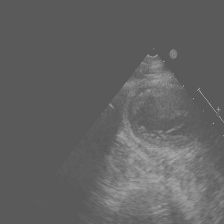

In [ ]:
# path = "/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/1/1270/1.npy"
path = "/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/1/1271/27.npy"

data = np.load(path).astype('float32')
print("视频npy形状:",data.shape)
data = data[10]
print("图片原来的尺寸:",data.shape)
data = crop_center_square(data)
print("裁剪后图片尺寸:",data.shape)

# scale_factor = random.uniform(0.6, 1.5)
scale_factor = 1.4

print(scale_factor)
scaled_size = (int(data.shape[1] * scale_factor), int(data.shape[0] * scale_factor))
random_offset = (random.randint(-10, 10), random.randint(-10, 10))

# 缩放图像
scaled_data = cv2.resize(data, scaled_size, interpolation=cv2.INTER_LINEAR)

# 进行平移操作
center = (data.shape[1] // 2 + random_offset[0], data.shape[0] // 2 + random_offset[1])
data = cv2.getRectSubPix(scaled_data, scaled_size, center)

data = cv2.resize(data,(224,224))
print("统一为",data.shape)

data = data.astype('uint8')
img = Image.fromarray(data)
img

In [ ]:
print(data)

[[90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]
 ...
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]
 [90 90 90 ... 90 90 90]]


In [ ]:
img = data.copy()
img[img<=95] = 0
img[img>150] = 255
img = ((img - img.min()) / (img.max()- img.min())) * 255
img = img.astype('uint8')
img = cv2.equalizeHist(img)
alpha = 0.8
beta = 0.1  # 图像的最小亮度值为50
img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# angle = np.random.randint(-30, 30)
angle = -10
M = cv2.getRotationMatrix2D((224/2, 224/2), angle, 1)
img = cv2.warpAffine(img, M, (224, 224))


# 将数据转换为图像
img = Image.fromarray(img)
img.save('augumentation2.jpg')

# statistics the frames counts from all videos


In [ ]:
all_video_path = []
for root,dirs,files in os.walk(SAVE_PATH):
    for file in files:
        video_path = root/Path(file)
        video_path = Path(video_path)
        all_video_path.append(video_path)
all_video_path = list(set(all_video_path))

In [ ]:
print("Dataset has %d videos"%(len(all_video_path))) #Dataset has 22882 videos

Dataset has 15776 videos


In [ ]:
all_video_path[:5]

[PosixPath('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/1/1327/45.npy'),
 PosixPath('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/1/1310/59.npy'),
 PosixPath('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/0/0104/52.npy'),
 PosixPath('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/1/1351/9.npy'),
 PosixPath('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/0/0058/51.npy')]

In [ ]:
video_with_label_1 = list(filter(lambda x: str(x).split('/')[-3]=='1',all_video_path))
video_with_label_0 = list(filter(lambda x: str(x).split('/')[-3]=='0',all_video_path))
print("%d videos has the label 1"%(len(video_with_label_1)))
print("%d videos has the label 0"%(len(video_with_label_0)))


8728 videos has the label 1
7048 videos has the label 0


100%|██████████| 15776/15776 [1:41:53<00:00,  2.58it/s]


the mean of data is: 32.58519269776876
the median of data is: 28.0


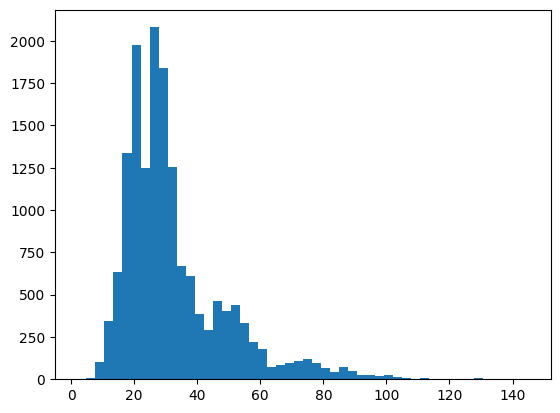

In [ ]:
# statistics the frames counts from all videos
length =  []
for path in tqdm(all_video_path):
    frames = np.load(path)
    frames_count = frames.shape[0]
    length.append(frames_count)
plt.hist(length,50)
print('the mean of data is:' ,np.mean(length))
print('the median of data is:' ,np.median(length))

We will drop the video with only 1 frame  
MAX_SEQ_LENGTH = 28  #based on median 

# Data Proprecessing

1. crop to square
2. resize -> (224,224)
3. uniform the length of frames in videos

In [ ]:
MAX_SEQ_LENGTH = 28 # uniform the length of frames in videos 
NUM_FEATURES = 1024
IMG_SIZE = 224
class_vocab = ['0','1']

In [ ]:
# 统一帧数
def uniform_frames(MAX_SEQ_LENGTH, video_arr):
    frames_count = len(video_arr)
    if frames_count < MAX_SEQ_LENGTH: 
        diff = MAX_SEQ_LENGTH - frames_count 
        multiplier = diff//frames_count + 1  
        padding = video_arr
        for _ in range(multiplier):
            video_arr = np.concatenate((video_arr, padding))    
    video_arr = video_arr[:MAX_SEQ_LENGTH]
    return video_arr

In [ ]:
def load_video(video_path):
    frames = np.load(video_path)
    frames = frames.astype('float32')
    res = []
    for frame in frames:
        frame = crop_center_square(frame)
        frame = cv2.resize(frame,(IMG_SIZE,IMG_SIZE))
        frame[frame<=95] = 0
        frame[frame>160] = 255
        frame = ((frame - frame.min()) / (frame.max()- frame.min())) * 255
        frame = frame.astype('uint8')
        frame = cv2.equalizeHist(frame)
        alpha = 0.8
        beta = -1# 图像的最小亮度值为50
        frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)
    
        color_img = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)
        color_img[:, :, 0] = frame
        color_img[:, :, 1] = frame
        color_img[:, :, 2] = frame

        res.append(color_img)
    
    frames = uniform_frames(29,res)
    frames = np.array(frames)
    return frames


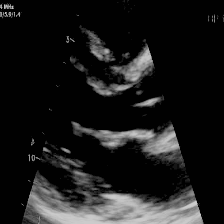

In [ ]:

import imageio
from IPython.display import Image


frames = load_video('/content/drive/MyDrive/capstone/dataset/Processed_with_pydicom/0/0014/7.npy')
frames = frames.astype(np.uint8)
imageio.mimsave("animation.gif", frames, fps=10)
Image(filename='animation.gif',embed=True)